# Detecting Vehicles

Here we are trying to create a model to detect 10 types of vehicles.

This is a dataset Arunoda created based on Google search images.
You can get it from [here](https://github.com/arunoda/fastai-courses/releases/tag/fastai-vehicles-dataset).

In [1]:
from fastai2.vision.all import *

## Getting Data

I had some issues with using fast.ai's `untar_data`. So, I simply use curl to download my dataset.

In [2]:
!curl -L https://github.com/arunoda/fastai-courses/releases/download/fastai-vehicles-dataset/fastai-vehicles.tgz --output /tmp/vehicles.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   632  100   632    0     0   2539      0 --:--:-- --:--:-- --:--:--  2538
100 32.7M  100 32.7M    0     0  30.8M      0  0:00:01  0:00:01 --:--:-- 30.8M


In [5]:
!cd /tmp && tar xzf /tmp/vehicles.tgz && mv images fastai-vehicles

mv: cannot move 'images' to 'fastai-vehicles/images': File exists


In [6]:
im_path = Path('/tmp/fastai-vehicles')

In [7]:
im_path.ls()

(#1170) [Path('/tmp/fastai-vehicles/ suzuki-wagonr-0.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-1.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-10.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-100.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-101.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-102.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-103.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-104.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-105.jpg'),Path('/tmp/fastai-vehicles/ suzuki-wagonr-106.jpg')...]

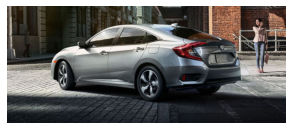

In [8]:
show_image(Image.open(im_path.ls()[500]))

## Let's load Images

In [9]:
def get_vehicle_type(p):
    return re.sub('-[0-9]+.*', '', p.name)

get_vehicle_type(im_path.ls()[500])

'honda-civic'

In [10]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.3),
    get_y=get_vehicle_type,
    item_tfms=Resize(224)
)

In [11]:
dls = db.dataloaders(im_path)

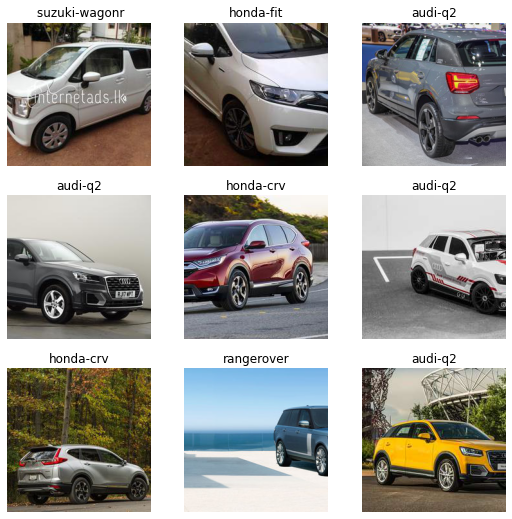

In [12]:
dls.show_batch()

In [13]:
## These are the types of vehicles we have.
dls.vocab

(#10) [' suzuki-wagonr','audi-a3','audi-q2','defender','honda-civic','honda-crv','honda-fit','jeep-wrangler','rangerover','suzuki-swift']

## Let's Create Our Model

In [16]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [17]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.366292,0.611609,0.793153,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.758386,0.242055,0.925820,00:18
1,0.440215,0.142988,0.954351,00:18
2,0.275493,0.082038,0.972896,00:18
3,0.179663,0.078276,0.972896,00:18


## Let's Analyze Our Model

In [18]:
analyzer = ClassificationInterpretation.from_learner(learn)

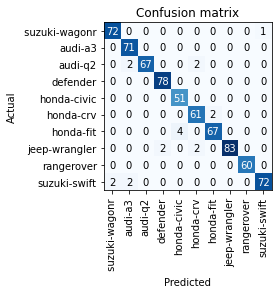

In [19]:
analyzer.plot_confusion_matrix()

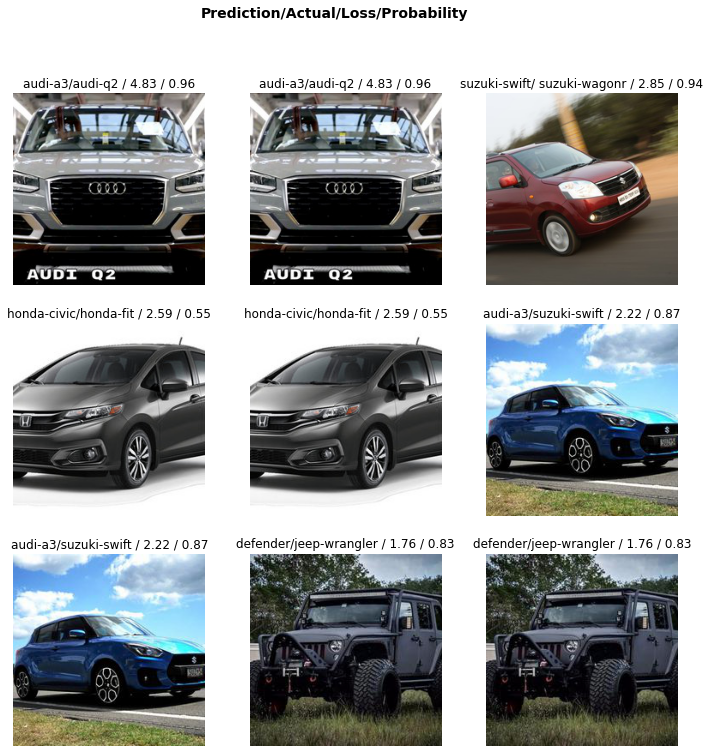

In [30]:
analyzer.plot_top_losses(9, figsize=(12, 12))